In [2]:

import csv
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [3]:
# load the HOG data that was collected
# Command used to conver HOGSearch.txt to HOGSearch.csv:
#       cat HOGSearch.txt | sed 's/testing accuracy //g' | sed 's/ | /,/g' | sed -z 's/\nAccuracy: /,/g' | sed 's/(/"(/g' | sed 's/)/)"/g' > HOGSearch.csv

data = []

with open("HOGSearch.csv", 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        data.append(row)

for row in data:
    row['n'] = int(row['n'])
    row['k'] = int(row['k'])
    # row['bs'] = (int(row['bs'][1]), int(row['bs'][4]))
    row['bs'] = int(row['bs'][1])
    # row['bls'] = (int(row['bls'][1]), int(row['bls'][4]))
    row['bls'] = int(row['bls'][1])
    # row['c'] = (int(row['c'][1]), int(row['c'][4]))
    row['c'] = int(row['c'][1])
    row['a'] = float(row['a'])

data = pd.DataFrame(data)

# print(data.describe())
print(data)

      n  bs  bls  c   k     a
0     5   2    1  1   4   7.7
1     5   2    1  1   7   7.7
2     5   2    1  1  10   7.2
3     5   2    1  1  14   7.5
4     5   2    1  1  18   7.4
..   ..  ..  ... ..  ..   ...
913  12   8    4  2  25  21.9
914  12   8    4  2  14  23.2
915  12   8    4  2  18  22.2
916  12   8    4  2  10  24.6
917  12   8    4  2  22  21.8

[918 rows x 6 columns]


Text(0, 0.5, 'accuracy')

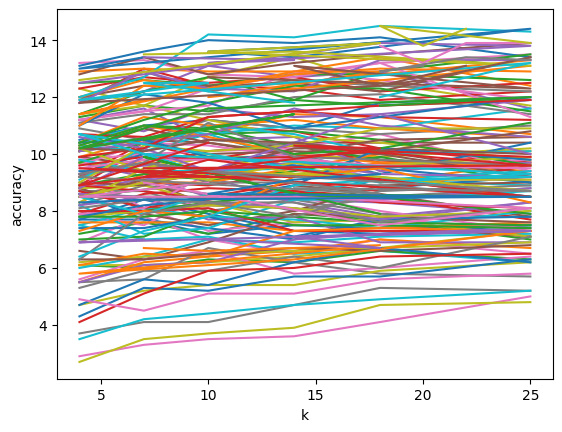

In [47]:
"""
HOG Graph
"""


graphData = {
    'a': [],
    'k': [],
    'labels': [],
}

for index, row in data.iterrows():
    if row['k'] > 25 or row['a'] > 20:
        continue
    label = "" + str(row['bs']) + " " + str(row['bls']) + " " + str(row['c']) + " " + str(row['n'])
    if label in graphData['labels']:
        i = graphData['labels'].index(label)
        graphData['a'][i].append(float(row['a']))
        graphData['k'][i].append(float(row['k']))
    else:
        graphData['labels'].append(label)
        i = len(graphData['labels']) - 1
        graphData['a'].append([])
        graphData['a'][i].append(float(row['a']))
        graphData['k'].append([])
        graphData['k'][i].append(float(row['k']))
# print(graphData)

for i in range(len(graphData['a'])):
    # print(graphData['k'][i])
    plt.plot(graphData['k'][i], graphData['a'][i], label=graphData['labels'][i])

plt.xlabel('k')
plt.ylabel('accuracy')

In [ ]:
"""


ABSOLUTELY NOTHING THAT WAS DONE WITH ADABOOST WAS VALUABLE BECAUSE OF A FUCK UP THAT CAUSED THE TRAINING TO BE GARBAGE

I'm leaving it all here just because I can

I will not be commenting or cleaning up any of it



"""

In [69]:
"""
AdaBoost Graph
"""

# command to make adaBoostThings.csv:
#       cat adaBoostThings.txt | sed 's/Depth: //g;s/n: //g;s/ Accuracy: /,/g;s/ //g' > adaBoostThings.csv

# load the adaboost data
data = []

with open("adaBoostThings.csv", 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        data.append(row)

for row in data:
    row['d'] = int(row['d'])
    row['n'] = int(row['n'])
    row['a'] = round(float(row['a']), 4) * 100

data = pd.DataFrame(data)

print(data)


    d     n     a
0   1    10  1.53
1   2    10  1.89
2   3    10  1.94
3   4    10  1.89
4   1    50  1.88
5   2    50  2.70
6   1   100  2.35
7   3    50  2.97
8   4    50  2.91
9   2   100  3.16
10  1   250  3.28
11  3   100  2.58
12  4   100  2.68
13  2   250  2.94
14  1   500  3.44
15  3   250  2.85
16  2   500  3.29
17  4   250  3.03
18  3   500  3.32
19  4   500  3.16
20  1  1000  3.89
21  2  1000  3.23
22  1  2500  4.27
23  3  1000  3.49
24  2  2500  3.99
25  3  2500  3.75


<Axes: xlabel='n', ylabel='d'>

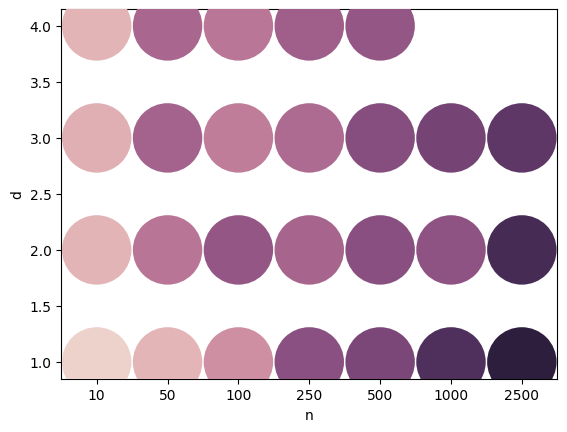

In [97]:
# Make a graph

# seaborn.pairplot(data)
# graphData = {
#     'a': [],
#     'nd': []
# }

# for index, row in data.iterrows():
#     graphData['a'].append(row['a'])
#     graphData['nd'].append(row['n'] + row['d'])

seaborn.swarmplot(data, x='n', y='d', hue='a', legend=False, size=50)